In [2]:
#!pip install --upgrade tensorflow

In [110]:
from typing import List, NamedTuple, Dict, Callable
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

${\displaystyle {\mathcal {U}}_{[a,b]}} = 0, 1$

In [4]:
normal = tfd.Uniform(low=0, high=1)
samples = normal.sample(100).numpy()

2021-12-02 02:08:52.051732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2021-12-02 02:08:52.051774: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-02 02:08:52.051793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mlops-book): /proc/driver/nvidia/version does not exist
2021-12-02 02:08:52.052997: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

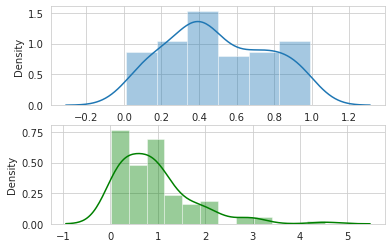

In [5]:
fig, axes = plt.subplots(2)
sns.distplot(samples, ax=axes[0])
sns.distplot(-np.log(samples), ax=axes[1], color="green")

$H(X) = log_b P(x_i)$

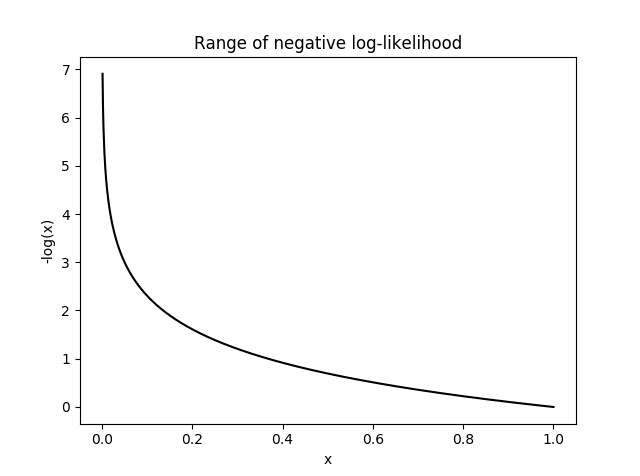

In [48]:
def shannon_entropy(sample: List) -> float:
    return np.nansum(sample * -np.log(sample))

shannon_entropy(samples)

26.846436

Cross entropy \
$\mathcal{H}(p, q) = - \sum_{k=1}^K p_k log q_k$

In [7]:
variable1 = normal.sample(100)
variable2 = normal.sample(100)

In [49]:
def cross_entropy(variable1: np.array, variable2: np.array) -> float:
    return - np.nansum(variable1 * np.log(variable2))

cross_entropy(variable1, variable2)

50.654877

Joint entropy \
$\mathcal{H}(X, Y) = - \sum_{x, y}p(x, y) log_2 p(x, y)$

In [9]:
import pandas as pd

binom1 = np.random.binomial(1, 0.3, 10)
binom2 = np.random.binomial(1, 0.3, 10)

df = pd.DataFrame({"x": binom1, "y": binom2})

In [10]:
prod= {}

for row in df.iterrows():
    if (row[1][0] == 0) & (row[1][1] == 0):
        if "00" in prod:
            prod["00"] += 1 
        else:
            prod["00"] = 1 
    elif (row[1][0] == 1) & (row[1][1] == 0):
        if "10" in prod:
            prod["10"] += 1 
        else:
            prod["10"] = 1 
    elif (row[1][0] == 0) & (row[1][1] == 1):
        if "01" in prod:
            prod["01"] += 1 
        else:
            prod["01"] = 1 
    elif (row[1][0] == 1) & (row[1][1] == 1):
        if "11" in prod:
            prod["11"] += 1 
        else:
            prod["11"] = 1 
    else: 
        pass
joint_prob =[value/10 for value in prod.values()]

In [11]:
def joint_entropy(joint_prob: np.array) -> float:
    return - np.sum(joint_prob * np.log2(joint_prob))

joint_entropy(joint_prob)

1.1567796494470395

KL Divergence

In [22]:
tfd.Poisson(2).sample(1000)

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([3., 2., 1., 2., 4., 0., 1., 2., 2., 1., 0., 5., 1., 2., 0., 1., 1.,
       0., 2., 1., 0., 3., 5., 1., 1., 0., 2., 2., 2., 3., 2., 0., 2., 3.,
       1., 0., 1., 4., 1., 2., 3., 2., 3., 2., 3., 0., 2., 2., 0., 2., 2.,
       1., 2., 1., 1., 1., 4., 4., 2., 4., 2., 5., 5., 5., 1., 1., 1., 4.,
       2., 3., 4., 1., 4., 5., 4., 1., 2., 3., 2., 2., 2., 0., 3., 2., 1.,
       2., 3., 1., 1., 1., 1., 0., 2., 4., 2., 4., 3., 1., 1., 0., 2., 3.,
       2., 4., 0., 4., 1., 1., 2., 2., 0., 1., 2., 0., 2., 3., 4., 0., 0.,
       4., 4., 2., 2., 1., 1., 1., 3., 3., 2., 1., 0., 2., 0., 2., 4., 3.,
       5., 0., 0., 2., 2., 2., 3., 4., 3., 1., 0., 0., 4., 2., 2., 1., 5.,
       1., 1., 2., 5., 2., 4., 2., 2., 0., 2., 1., 1., 0., 1., 1., 2., 1.,
       0., 3., 3., 1., 2., 4., 1., 1., 3., 3., 2., 1., 1., 3., 3., 2., 3.,
       1., 4., 2., 1., 3., 3., 1., 0., 3., 2., 2., 2., 0., 4., 2., 2., 1.,
       1., 3., 1., 5., 1., 3., 1., 1., 1., 1., 3., 

In [134]:
A = tfd.Poisson(2) # lambda = 2
sampleA =  A.sample(1000)
B = tfd.Poisson(5) # lambda = 5
sampleB = B.sample(1000)

In [135]:
pdfA = np.unique(A.prob(sampleA))
pdfB = np.unique(B.prob(sampleB))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

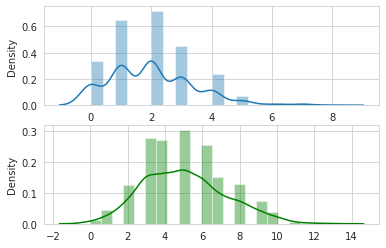

In [137]:
fig, axes = plt.subplots(2)
sns.distplot(sampleA, ax=axes[0])
sns.distplot(sampleB, ax=axes[1], color="green")

In [113]:
def kl_divergence(shannon_entropy: Callable, cross_entropy: Callable) -> float:
    return -shannon_entropy + cross_entropy

kl_divergence(shannon_entropy(pdfA), cross_entropy(pdfA, pdfB))